# Load Dependencies

In [1]:
import glob, re, os
import numpy as np
import matplotlib.pyplot as plt
from typing import List

In [2]:
%run cardiac_ml_tools.py

# Load Dataset

In [3]:
data_dirs = []
regex = r'data_hearts_dd_0p2*'
DIR='/home/ssk213/CSE_MSE_RXF131/cradle-members/sdle/ssk213/LLNL/intracardiac_dataset/' 
for x in os.listdir(DIR):
    if re.match(regex, x):
        data_dirs.append(DIR + x)
file_pairs = read_data_dirs(data_dirs)
print('Number of file pairs: {}'.format(len(file_pairs)))
# example of file pair
print("Example of file pair:")
print("{}\n{}".format(file_pairs[0][0], file_pairs[0][1]))

Number of file pairs: 16117
Example of file pair:
/home/ssk213/CSE_MSE_RXF131/cradle-members/sdle/ssk213/LLNL/intracardiac_dataset/data_hearts_dd_0p2/pECGData_hearts_dd_0p2_volunteer.v10_pattern.0.npy
/home/ssk213/CSE_MSE_RXF131/cradle-members/sdle/ssk213/LLNL/intracardiac_dataset/data_hearts_dd_0p2/VmData_hearts_dd_0p2_volunteer.v10_pattern.0.npy


# Graphing 500 ms Feature Graphs

Case 213 : /home/ssk213/CSE_MSE_RXF131/cradle-members/sdle/ssk213/LLNL/intracardiac_dataset/data_hearts_dd_0p2/pECGData_hearts_dd_0p2_volunteer.v1_pattern.18.npy


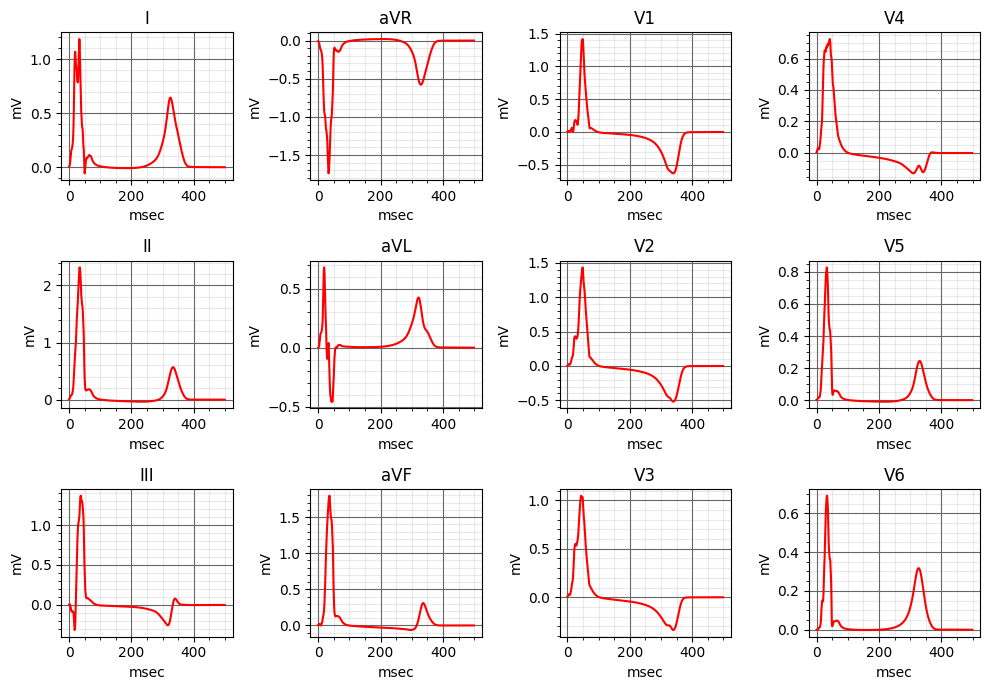

In [4]:
# Example 
case = 213
# ECG plot
row = 3 
column = 4
num_timesteps = 500
plt.figure(figsize=(10, 7))
titles = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]
reorder = {1:1,2:5,3:9,4:2,5:6,6:10,7:3,8:7,9:11,10:4,11:8,12:12} # reorder the leads to standard 12-lead ECG display

print('Case {} : {}'.format(case, file_pairs[case][0]))
pECGData = np.load(file_pairs[case][0])
pECGData = get_standard_leads(pECGData)

# create a figure with 12 subplots
for i in range(pECGData.shape[1]):
    plt.subplot(row, column, reorder[i + 1])
    plt.plot(pECGData[0:num_timesteps,i],'r')
    plt.title(titles[i])
    plt.grid(visible=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.xlabel('msec')
    plt.ylabel('mV')
plt.tight_layout()
plt.show()
# close
plt.close()

# Plotting Simulated Transmembrane Voltages

Case 213 : /home/ssk213/CSE_MSE_RXF131/cradle-members/sdle/ssk213/LLNL/intracardiac_dataset/data_hearts_dd_0p2/pECGData_hearts_dd_0p2_volunteer.v1_pattern.18.npy
(500, 75)


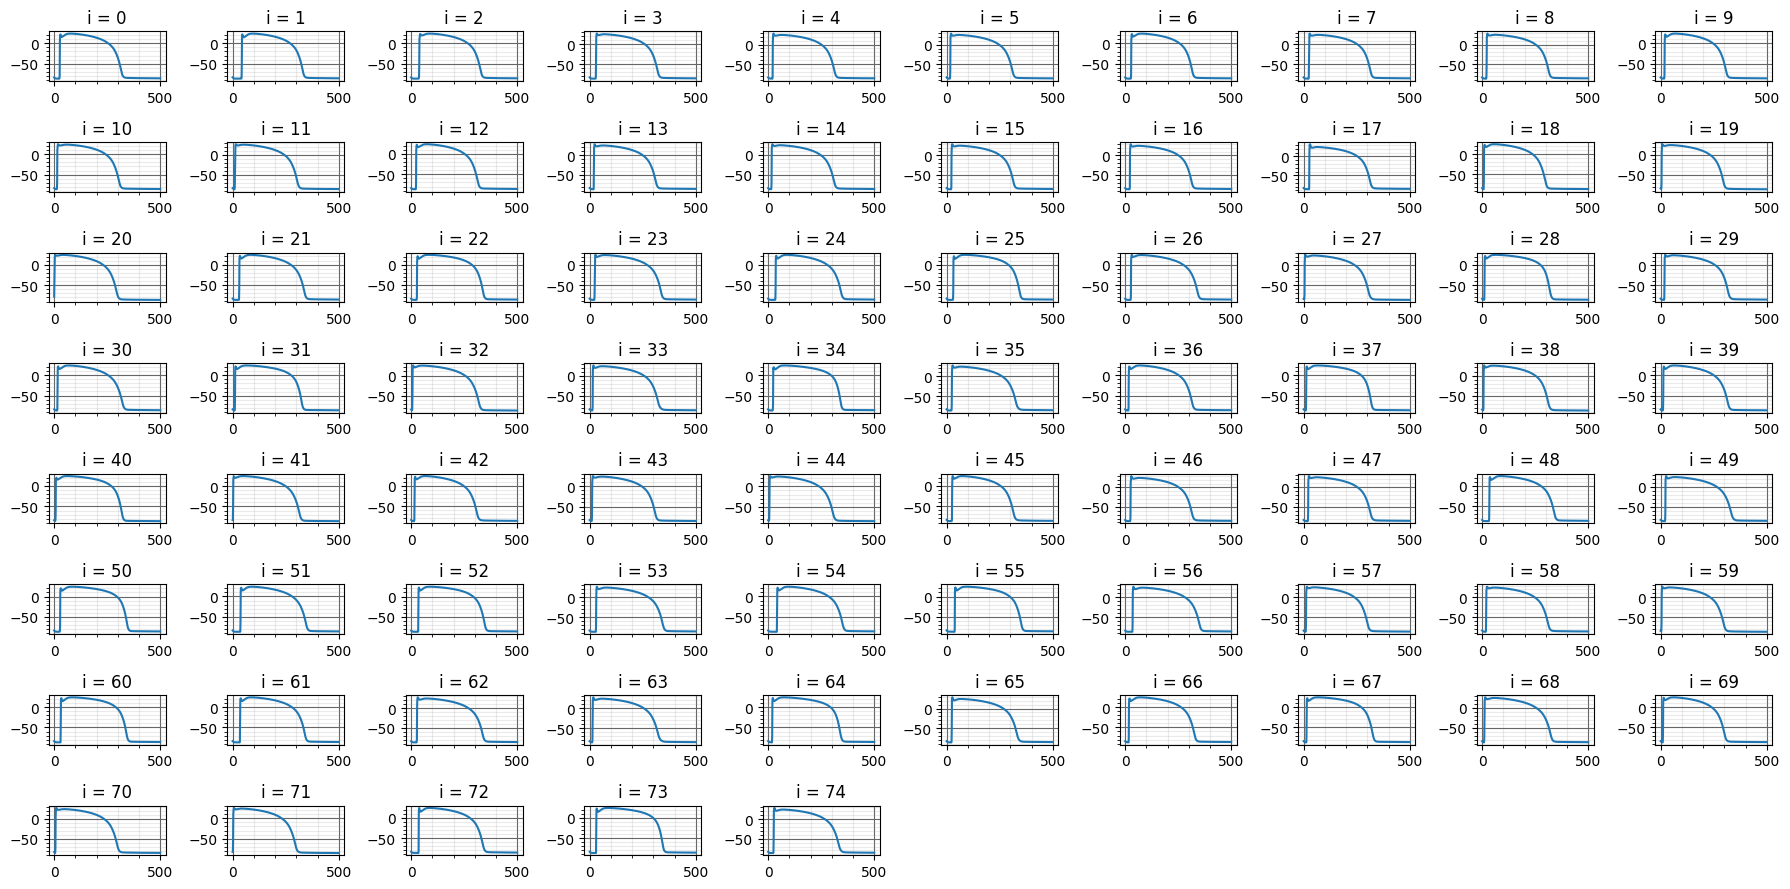

In [5]:
# Example of file pair
case = 213
# Vm plot
row = 7
column = 10
plt.figure(figsize=(18, 9))

print('Case {} : {}'.format(case, file_pairs[case][0]))
VmData = np.load(file_pairs[case][1])
print(VmData.shape)

for count, i in enumerate(range(VmData.shape[1])):
    plt.subplot(8, 10, count + 1)
    plt.plot(VmData[0:num_timesteps,i])
    plt.title(f'i = {i}')
    plt.grid(visible=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    # plt.xlabel('msec')
    # plt.ylabel('mV')
plt.tight_layout()
plt.show()
# close
plt.close()

# Transmembrane Voltage Heatmaps

Case 213 : /home/ssk213/CSE_MSE_RXF131/cradle-members/sdle/ssk213/LLNL/intracardiac_dataset/data_hearts_dd_0p2/pECGData_hearts_dd_0p2_volunteer.v1_pattern.18.npy
Case 213 : /home/ssk213/CSE_MSE_RXF131/cradle-members/sdle/ssk213/LLNL/intracardiac_dataset/data_hearts_dd_0p2/pECGData_hearts_dd_0p2_volunteer.v1_pattern.18.npy


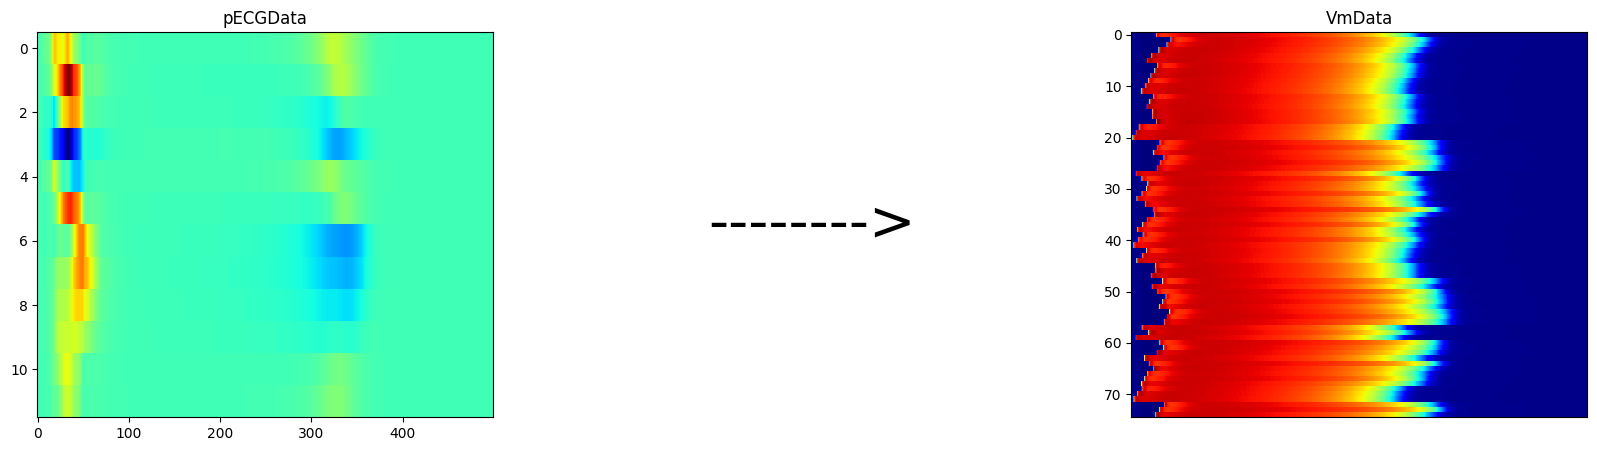

In [6]:
# make a plot with the "pECGData" -> "ActTime"
case = 213

print('Case {} : {}'.format(case, file_pairs[case][0]))
pECGData = np.load(file_pairs[case][0])
pECGData = get_standard_leads(pECGData)

print('Case {} : {}'.format(case, file_pairs[case][0]))
VmData = np.load(file_pairs[case][1])

# plot in row the tensors pECGData and ActTime with an arrow pointing to the activation time
row = 1
column = 3
plt.figure(figsize=(20, 5))
plt.subplot(row, column, 1)
# plot pECGData transposed
plt.imshow(pECGData.T, cmap='jet', interpolation='nearest', aspect='auto')
plt.title('pECGData')
plt.subplot(row, column, 2)
# print a text "->"
plt.text(0.5, 0.5, '-------->', fontsize=40, horizontalalignment='center', verticalalignment='center')
plt.axis('off')
plt.subplot(row, column, 3)
# plot Vm transposed
plt.imshow(VmData.T, cmap='jet', interpolation='nearest', aspect='auto')
# not xticks
plt.xticks([])
plt.title('VmData')
plt.show()
plt.close()

# Extracting pECG/Vm data and running get_standard_leads()

In [7]:
pECG_12 = []
Vm = []

for pair in file_pairs:
    pECG_12.append(get_standard_leads(np.load(pair[0])).T)
    Vm.append(np.load(pair[1]).T)

pECG_12 = np.array(pECG_12)
Vm = np.array(Vm)

print(f"Reshaped pECG: {pECG_12.shape}")
print(f"Activation Times: {Vm.shape}")

Reshaped pECG: (16117, 12, 500)
Activation Times: (16117, 75, 500)


# Data Splitting

In [8]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

torch.manual_seed(41)

X_train, X_test, y_train, y_test = train_test_split(pECG_12, Vm, test_size=0.2, random_state=42)

X_train = torch.from_numpy(np.array(X_train)).float()
X_test = torch.from_numpy(np.array(X_test)).float()
y_train = torch.from_numpy(np.array(y_train)).float()
y_test = torch.from_numpy(np.array(y_test)).float()

print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

examples = iter(train_loader)
samples, labels = next(examples)
print(f"One Batch Size: {samples.shape, labels.shape}")

X_train shape: torch.Size([12893, 12, 500])
X_test shape: torch.Size([3224, 12, 500])
y_train shape: torch.Size([12893, 75, 500])
y_test shape: torch.Size([3224, 75, 500])
One Batch Size: (torch.Size([32, 12, 500]), torch.Size([32, 75, 500]))


# Model

Using device: cuda
ECGActivationMap(
  (conv1): Conv1d(12, 32, kernel_size=(5,), stride=(1,), padding=(2,))
  (conv2): Conv1d(32, 64, kernel_size=(5,), stride=(1,), padding=(2,))
  (conv3): Conv1d(64, 128, kernel_size=(5,), stride=(1,), padding=(2,))
  (fc1): Linear(in_features=64000, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=37500, bias=True)
  (relu): ReLU()
)
Epoch [1/50], Step [100/403], Loss: 516.2437
Epoch [1/50], Step [200/403], Loss: 337.6604
Epoch [1/50], Step [300/403], Loss: 328.9509
Epoch [1/50], Step [400/403], Loss: 288.3356
Epoch [2/50], Step [100/403], Loss: 250.7157
Epoch [2/50], Step [200/403], Loss: 276.2076
Epoch [2/50], Step [300/403], Loss: 253.5055
Epoch [2/50], Step [400/403], Loss: 275.4684
Epoch [3/50], Step [100/403], Loss: 279.0172
Epoch [3/50], Step [200/403], Loss: 249.3553
Epoch [3/50], Step [300/403], Loss: 262.0559
Epoch [3/50], Step [400/403], Loss: 241.4279
Epoch [4/50], Step [100/403], Loss: 233.3957
Epoch [4/50], Ste

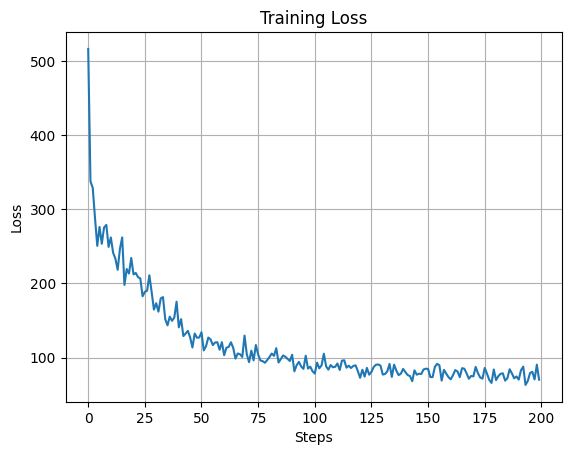

In [10]:
import torch
import torch.nn as nn 
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

class ECGActivationMap(nn.Module):
    def __init__(self):
        super(ECGActivationMap, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv1d(12, 32, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=5, stride=1, padding=2)
        self.conv3 = nn.Conv1d(64, 128, kernel_size=5, stride=1, padding=2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(128 * 500, 512)
        self.fc2 = nn.Linear(512, 75 * 500)
        
        # Activation functions
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        
        # Flatten
        x = x.view(x.size(0), -1)
        
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.view(x.size(0), 75, 500)
        
        return x

# Create the model
model = ECGActivationMap().to(device)
print(model)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

epochs = 50
n_total_steps = len(train_loader)
losses = []

for epoch in range(epochs):
    for i, (features, labels) in enumerate(train_loader):
        features = features.to(device)
        labels = labels.to(device)
        
        outputs = model(features)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            losses.append(loss.item())

print("Finished Training")

# Plot the training loss
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# Calculating Accuracy

In [11]:
with torch.no_grad():
    n_samples = 0
    total_loss = 0.0
    for features, labels in test_loader:
        features = features.to(device)
        labels = labels.to(device)
        
        outputs = model(features)
        loss = criterion(outputs, labels)
        
        n_samples += labels.size(0)
        total_loss += loss.item() * labels.size(0)

    avg_loss = total_loss / n_samples
    print(f"Number of samples: {n_samples}")
    print(f"Average Loss: {avg_loss:.4f}")

Number of samples: 3224
Average Loss: 84.0067


# Comparing Activation Heatmaps from Model and Vm Data

torch.Size([3224, 75, 500])
tensor([[-89.1401, -88.0513, -87.5704,  ..., -85.4179, -85.4261, -85.4342],
        [-88.5278, -87.9612, -88.3062,  ..., -85.0676, -85.0790, -85.0903],
        [-88.5494, -93.4027, -90.6415,  ..., -85.5391, -85.5458, -85.5524],
        ...,
        [-88.5374, -88.1794, -89.1920,  ..., -85.2352, -85.2448, -85.2542],
        [-87.2063, -87.9140, -89.0691,  ..., -84.3950, -84.4208, -84.4445],
        [-86.1907, -85.6430, -81.6922,  ..., -85.3419, -85.3516, -85.3611]])
torch.Size([3224, 75, 500])
tensor([[-85.8837, -85.8781, -85.8758,  ..., -85.1918, -85.1999, -85.2079],
        [-85.7528, -85.7530, -85.7532,  ..., -84.7469, -84.7593, -84.7716],
        [-85.8911, -85.8925, -85.8932,  ..., -85.3959, -85.4013, -85.4066],
        ...,
        [-85.8782, -85.8733, -85.8714,  ..., -84.9740, -84.9863, -84.9983],
        [-85.7528, -85.7530, -85.7529,  ..., -84.1630, -84.1877, -84.2117],
        [-85.9061, -85.9010, -85.8990,  ..., -85.1259, -85.1358, -85.1456]])


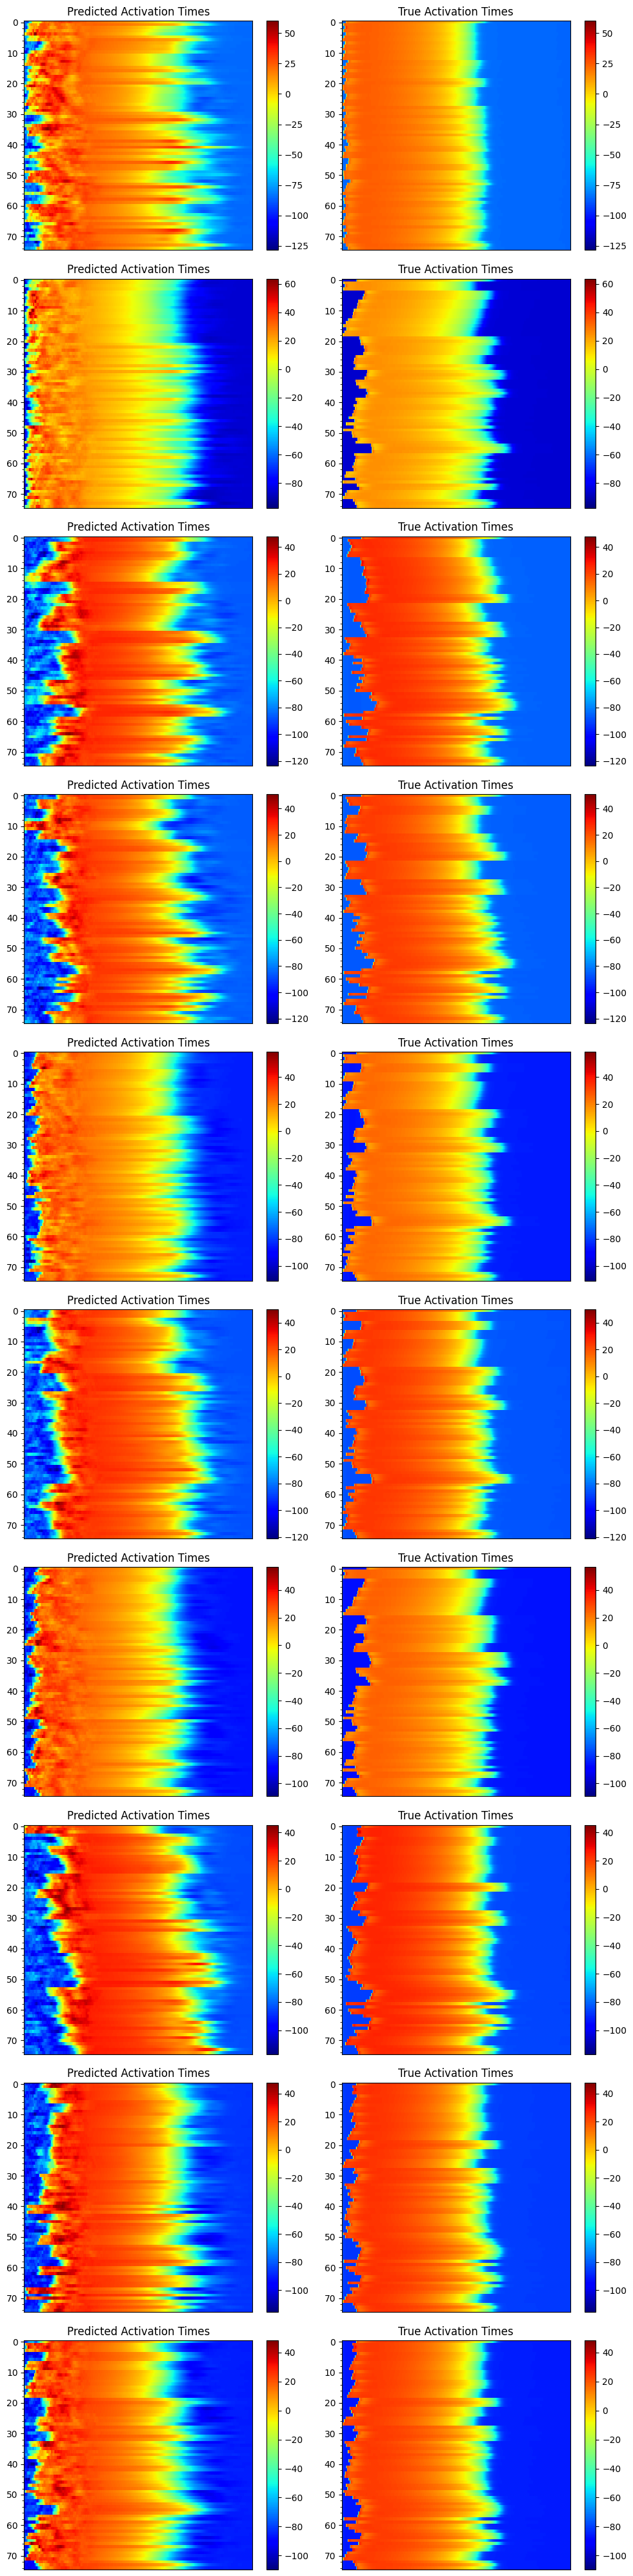

In [12]:
# Obtain predicted values
with torch.no_grad():
    model = model.cpu()
    X_test = X_test.cpu()
    y_pred = model(X_test)

print(y_pred.shape)
print(y_pred[0])
print(y_test.shape)
print(y_test[0])

y_pred_np = y_pred.cpu().numpy() if torch.is_tensor(y_pred) else y_pred
Vm_np = Vm.cpu().numpy() if torch.is_tensor(Vm) else Vm

# plot 10 different 75 x 500 activation heatmaps 
num = 10
fig, axs = plt.subplots(num, 2, figsize=(10, num*4))

for i in range(num):

    iter_min = min(np.min(y_pred_np[i]), np.min(Vm_np[i]))
    iter_max = max(np.max(y_pred_np[i]), np.max(Vm_np[i]))


    ax = axs[i, 0]
    im = ax.imshow(y_pred[i], cmap='jet', interpolation='nearest', aspect='auto', vmin=iter_min, vmax=iter_max)
    ax.set_title('Predicted Activation Times')
    fig.colorbar(im, ax=ax)
    ax.minorticks_on()
    ax.set_xticks([])

    ax = axs[i, 1]
    im = ax.imshow(Vm[i], cmap='jet', interpolation='nearest', aspect='auto', vmin=iter_min, vmax=iter_max)
    ax.set_title('True Activation Times')
    fig.colorbar(im, ax=ax)
    ax.minorticks_on()
    ax.set_xticks([])

plt.tight_layout()
plt.show()

# Graphing Predicted 500 ms Results

Case #3066 obtained from the testing data:


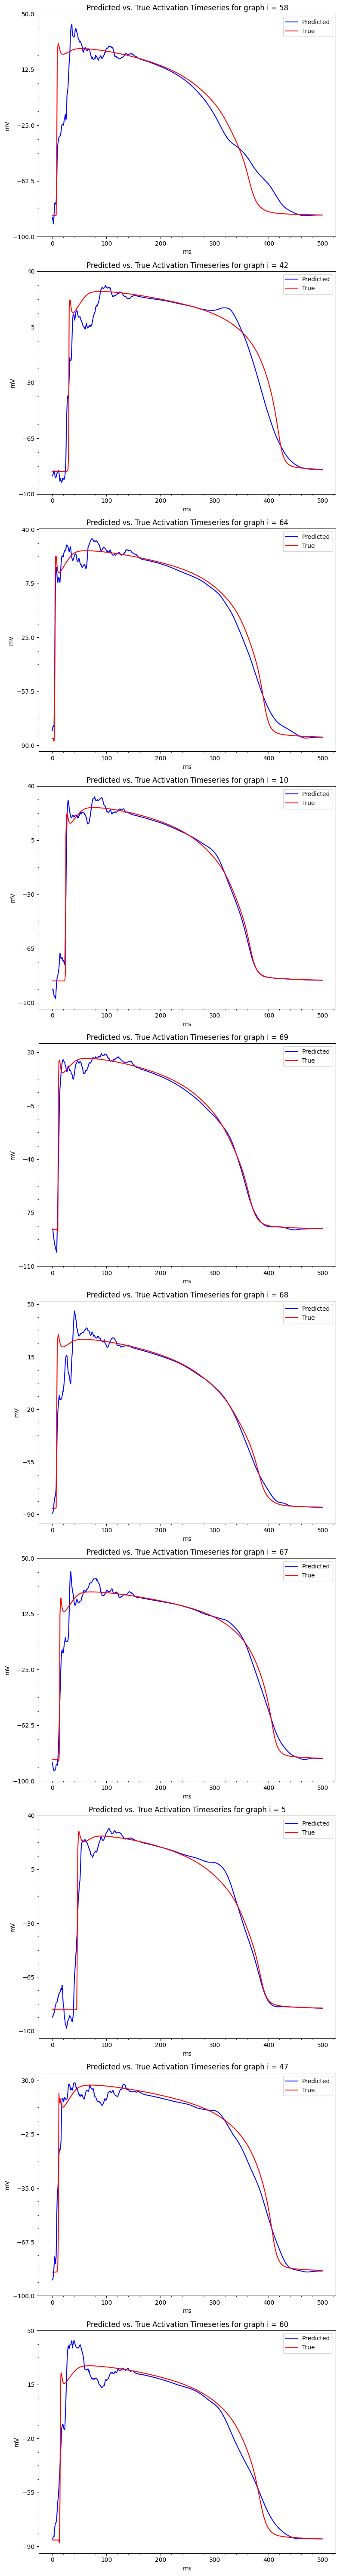

In [17]:
import math
import random

# Generate a random case number
case = random.randint(1, 3223)
print(f"Case #{case} obtained from the testing data:")

pred_case = np.array(y_pred[case])
test_case = np.array(y_test[case])

# Generate an array of 10 randomly selected numbers from 0 to 74
nums = np.random.choice(75, 10, replace=False)

fig, axs = plt.subplots(len(nums), 1, figsize=(8, 6*len(nums)))

for i, num in enumerate(nums):
    
    # Obtianing min/max values to get the same y-scales
    min_val = np.minimum(np.min(pred_case[num]), np.min(test_case[num]))
    max_val = np.maximum(np.max(pred_case[num]), np.max(test_case[num]))

    # Rounding the the nearest 10
    min_val = math.floor(min_val / 10) * 10
    max_val = math.ceil(max_val / 10) * 10

    # Predicted Activation Timeseries
    ax = axs[i]
    ax.plot(pred_case[num], color='blue', label='Predicted')
    ax.plot(test_case[num], color='red', label='True')
    ax.set_title(f'Predicted vs. True Activation Timeseries for graph i = {num}')
    ax.minorticks_on()
    ax.set_xlabel('ms')
    ax.set_xticks([0, 100, 200, 300, 400, 500])
    ax.set_ylabel('mV')
    ax.set_yticks(np.linspace(min_val, max_val, 5))
    ax.legend()

plt.tight_layout()
plt.show()
